# Accessible Data Vizualization: Beyond Color
### by Adam Richman

## Modules

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from IPython.display import Image

import matplotlib
matplotlib.use('Agg')

## Project Goal
This notebook explores how to make data visualizations more accessible to individuals with visual impairments, particularly those with color vision deficiencies (CVD), by using redundant cues like texture, shape, and annotations.

Note: Color blindness comes in several forms (protanopia, deuteranopia, tritanopia, etc.), so what works for one
user may not work for another. Designing for redundancy helps ensure clarity across more user experiences.

## Sample data generation

In [2]:
np.random.seed(42)
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Value': np.random.randint(30, 100, 4)
})

## Section 1: Default (Non-Accessible) Bar Plot
This bar plot uses only color (from the Set1 palette) to distinguish categories. For those with red-green color blindness, this may be indistinguishable or confusing.

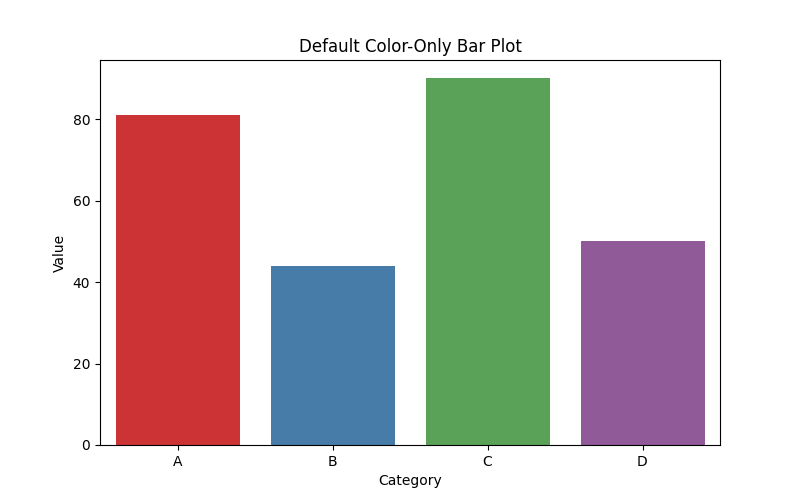

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Category', y='Value', hue='Category', dodge=False, palette='Set1', legend=False)
plt.title('Default Color-Only Bar Plot')
plt.savefig("plot1_default_color_only_bar.png")
plt.close()
Image("plot1_default_color_only_bar.png")

## Section 2: CVD-Friendly Bar Plot with Hatching and Labels
We add redundant visual cues by:
- Using a colorblind-safe palette
- Adding hatching patterns
- Annotating values directly above bars
  
This increases interpretability regardless of color perception.

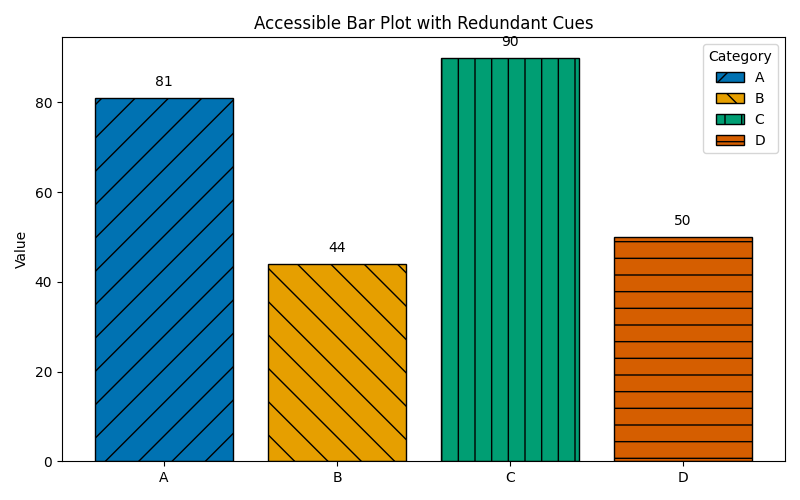

In [9]:
patterns = ['/', '\\', '|', '-']
colors = ['#0072B2', '#E69F00', '#009E73', '#D55E00']  # CVD-safe palette

fig, ax = plt.subplots(figsize=(8, 5))
for i, (category, value) in enumerate(zip(data['Category'], data['Value'])):
    bar = ax.bar(i, value, color=colors[i], hatch=patterns[i], edgecolor='black', label=category)
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10)

ax.set_xticks(range(len(data['Category'])))
ax.set_xticklabels(data['Category'])
ax.set_title('Accessible Bar Plot with Redundant Cues')
ax.set_ylabel('Value')
ax.legend(title='Category')
plt.tight_layout()
plt.savefig("plot2_accessible_bar_with_hatching.png")
plt.close()
Image("plot2_accessible_bar_with_hatching.png")

## Section 3: Scatter Plot with Color-Only Markers
This plot again uses only color to distinguish between categories. Without additional cues, users with CVD
or in grayscale/print view may not understand which point represents which group.

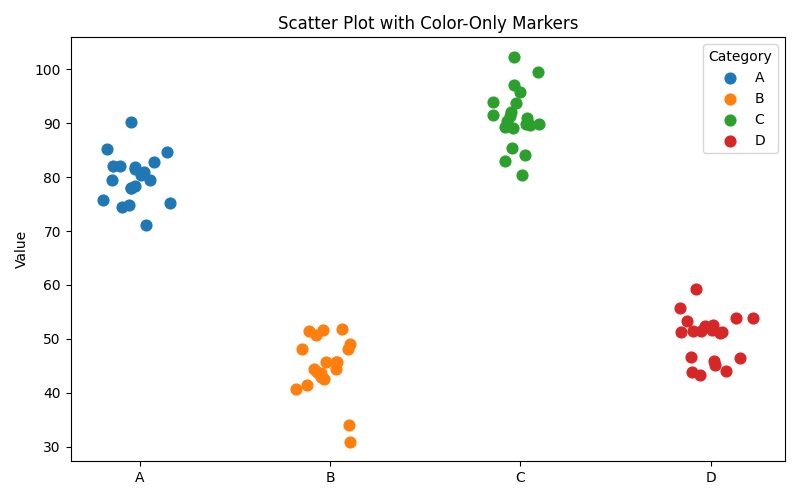

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
for i, category in enumerate(data['Category']):
    x = np.random.normal(i, 0.1, 20)
    y = np.random.normal(data.loc[i, 'Value'], 5, 20)
    ax.scatter(x, y, label=category, s=60)

ax.set_xticks(range(len(data['Category'])))
ax.set_xticklabels(data['Category'])
ax.set_title('Scatter Plot with Color-Only Markers')
ax.set_ylabel('Value')
ax.legend(title='Category')
plt.tight_layout()
plt.savefig("plot3_scatter_color_only.png")
plt.close()
Image("plot3_scatter_color_only.png")

## Section 4: Accessible Scatter Plot with Shape Encoding
We redesign the scatter plot using:
- Unique shapes (markers) per category
- Color + black outlines for contrast

This helps distinguish data even in cases of color blindness or printing in black & white.

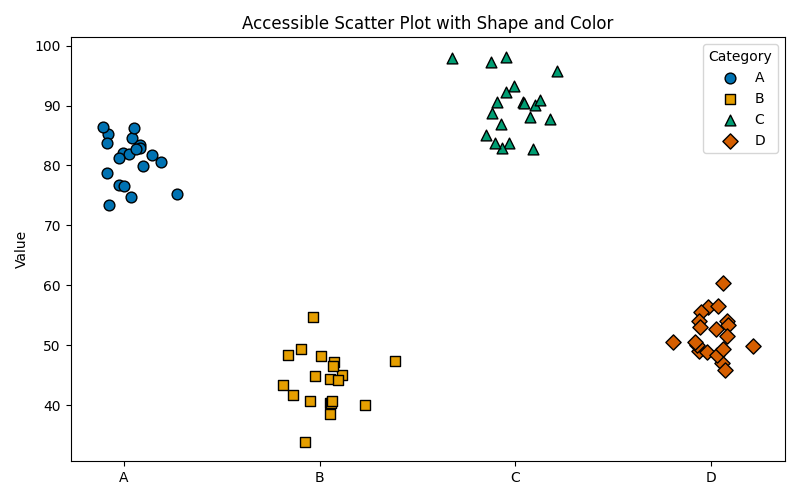

In [11]:
markers = ['o', 's', '^', 'D']
fig, ax = plt.subplots(figsize=(8, 5))
for i, category in enumerate(data['Category']):
    x = np.random.normal(i, 0.1, 20)
    y = np.random.normal(data.loc[i, 'Value'], 5, 20)
    ax.scatter(x, y, label=category, marker=markers[i], color=colors[i], edgecolor='black', s=60)

ax.set_xticks(range(len(data['Category'])))
ax.set_xticklabels(data['Category'])
ax.set_title('Accessible Scatter Plot with Shape and Color')
ax.set_ylabel('Value')
ax.legend(title='Category')
plt.tight_layout()
plt.savefig("plot4_accessible_scatter_shapes.png")
plt.close()
Image("plot4_accessible_scatter_shapes.png")

## Key Takeaways for Accessible Data Visualization
- Avoid using color as the only way to encode data
- Add redundant cues: hatching, shapes, annotations
- Use CVD-safe palettes (e.g., ColorBrewer, Paul Tol, Okabe-Ito)
- Improve contrast, font size, and spacing
- Consider how your chart looks in grayscale or when blurred

**Designing for accessibility benefits everyone - not just users with impairments and shows a commitment to thoughtful, inclusive communication.**